<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

### Importar librerias

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer

### Funciones,

In [8]:
def exploracion_data (df):
    s=df.shape
    t=df.dtypes
    i=df.info()
    l=list(data.columns)
    d=df.describe(include='O')
    d_o=df.describe(include='object')
    return s, t, d, i, l, d_o    

def valores_vacios(df):
    vacios_data = df.isnull().sum()
    mx = msno.matrix(df)
    barras = msno.bar(df)
    dendro = msno.dendrogram(df)
    return vacios_data, mx, barras, dendro

def visualizar_datos(df):
    print(data.head())
    print(data.tail())
    print(data.sample(5))

def imput_faltantes(df):
    df_imput = df.copy()
    for i in df:
        if df_imput[i].dtypes == object:
            df_imput[i].fillna(df_imput[i].mode()[0], inplace = True)
        else:
            df_imput[i].fillna(df_imput[i].mean(), inplace = True)
    return df_imput

### Cargar Datos, Unir bases, definir indices

In [9]:
# Importar archivos txt.

SB11_20191_txt = pd.read_csv('Archivos/SB11_20191.txt', delimiter='¬', header=0, keep_default_na=True)
SB11_20201_txt = pd.read_csv('Archivos/SB11_20201.txt', delimiter='¬', header=0, keep_default_na=True)
SB11_20211_txt = pd.read_csv('Archivos/SB11_20211.txt', delimiter='¬', header=0, keep_default_na=True)

# Unir bases de datos

a = pd.concat([SB11_20211_txt, SB11_20201_txt], axis=0, ignore_index=True)
data = pd.concat([a, SB11_20191_txt], axis=0, ignore_index=True)

#definir indice

data.set_index("ESTU_CONSECUTIVO", append=False, drop=True, inplace =True)



<ipython-input-9-388b02318baa>:3: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  SB11_20191_txt = pd.read_csv('Archivos/SB11_20191.txt', delimiter='¬', header=0, keep_default_na=True)
<ipython-input-9-388b02318baa>:4: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  SB11_20201_txt = pd.read_csv('Archivos/SB11_20201.txt', delimiter='¬', header=0, keep_default_na=True)
<ipython-input-9-388b02318baa>:5: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  SB11_20211_txt = pd.read_csv(

### Visualizar datos del dataframe

In [10]:
visualizar_datos(data)

                 ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO  \
ESTU_CONSECUTIVO                                                    
SB11202110042506                 TI          COLOMBIA           M   
SB11202110041799                 TI          COLOMBIA           F   
SB11202110043835                 TI          COLOMBIA           F   
SB11202110043668                 TI          COLOMBIA           F   
SB11202110043350                 TI          COLOMBIA           F   

                 ESTU_FECHANACIMIENTO  PERIODO ESTU_ESTUDIANTE  \
ESTU_CONSECUTIVO                                                 
SB11202110042506           05/11/2003    20211      ESTUDIANTE   
SB11202110041799           06/10/2004    20211      ESTUDIANTE   
SB11202110043835           01/10/2003    20211      ESTUDIANTE   
SB11202110043668           13/01/2003    20211      ESTUDIANTE   
SB11202110043350           29/08/2004    20211      ESTUDIANTE   

                 ESTU_PAIS_RESIDE ESTU_TIENEETNIA EST

### Exploración datos del dataframe

In [11]:
exploracion_data(data)

<class 'pandas.core.frame.DataFrame'>
Index: 52046 entries, SB11202110042506 to SB11201910016385
Data columns (total 82 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_TIPODOCUMENTO             52046 non-null  object 
 1   ESTU_NACIONALIDAD              52046 non-null  object 
 2   ESTU_GENERO                    52040 non-null  object 
 3   ESTU_FECHANACIMIENTO           52046 non-null  object 
 4   PERIODO                        52046 non-null  int64  
 5   ESTU_ESTUDIANTE                52046 non-null  object 
 6   ESTU_PAIS_RESIDE               52046 non-null  object 
 7   ESTU_TIENEETNIA                49574 non-null  object 
 8   ESTU_DEPTO_RESIDE              51257 non-null  object 
 9   ESTU_COD_RESIDE_DEPTO          51257 non-null  float64
 10  ESTU_MCPIO_RESIDE              51257 non-null  object 
 11  ESTU_COD_RESIDE_MCPIO          51257 non-null  float64
 12  FAMI_ESTRATOVIVIENDA     

((52046, 82),
 ESTU_TIPODOCUMENTO           object
 ESTU_NACIONALIDAD            object
 ESTU_GENERO                  object
 ESTU_FECHANACIMIENTO         object
 PERIODO                       int64
                              ...   
 ESTU_INSE_INDIVIDUAL        float64
 ESTU_NSE_INDIVIDUAL         float64
 ESTU_NSE_ESTABLECIMIENTO    float64
 ESTU_GENERACION-E            object
 ESTU_ETNIA                   object
 Length: 82, dtype: object,
        ESTU_TIPODOCUMENTO ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO  \
 count               52046             52046       52040                52046   
 unique                 10                37           2                 6611   
 top                    TI          COLOMBIA           M           01/01/1900   
 freq                40462             51707       26268                  117   
 
        ESTU_ESTUDIANTE ESTU_PAIS_RESIDE ESTU_TIENEETNIA ESTU_DEPTO_RESIDE  \
 count            52046            52046           49574          

<AxesSubplot:>

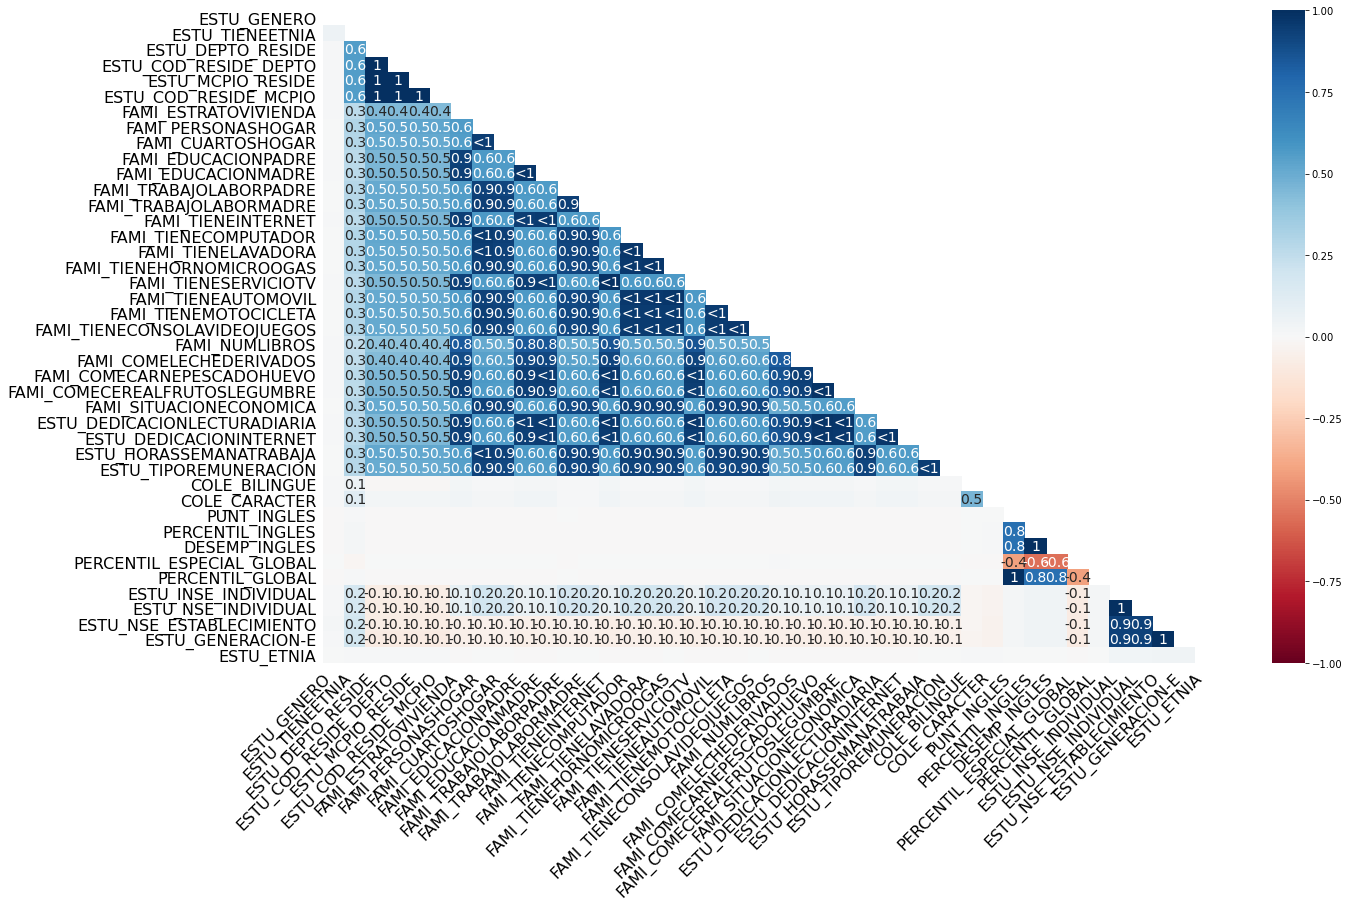

In [12]:
msno.heatmap(data)

### Valores Vacios

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (82).

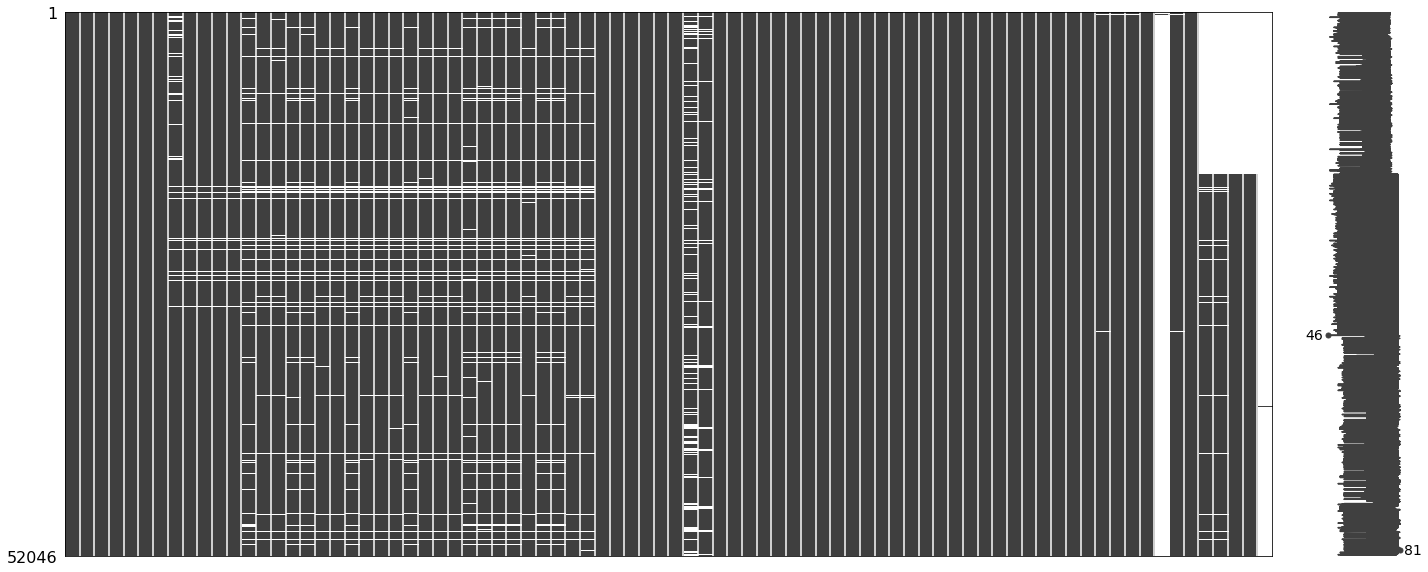

In [13]:
valores_vacios(data)
msno.heatmap(data)
mx = msno.matrix(data)

Una vez realizado el analisis exploratorio procedemos a limpiar la base . 1ro eliminamos aquellas variables que no presentan una correlacion importante, adicional a eliminar columnas con gran cantidad de valores perdidos y que dada la cantidad no se revelante realizar un proceso de imputación.

In [14]:
data = data.drop(['ESTU_ETNIA','ESTU_GENERACION-E','ESTU_NSE_ESTABLECIMIENTO','ESTU_NSE_INDIVIDUAL','ESTU_INSE_INDIVIDUAL',
           'PERCENTIL_ESPECIAL_GLOBAL','ESTU_ESTADOINVESTIGACION','PERCENTIL_GLOBAL','COLE_CARACTER','COLE_BILINGUE',
           'DESEMP_INGLES','PERCENTIL_INGLES','PUNT_INGLES','DESEMP_SOCIALES_CIUDADANAS','PERCENTIL_SOCIALES_CIUDADANAS',
           'PUNT_SOCIALES_CIUDADANAS','DESEMP_C_NATURALES','PERCENTIL_C_NATURALES','PUNT_C_NATURALES','DESEMP_MATEMATICAS',
           'PERCENTIL_MATEMATICAS','PUNT_MATEMATICAS','DESEMP_LECTURA_CRITICA','PERCENTIL_LECTURA_CRITICA','PUNT_LECTURA_CRITICA',
           'ESTU_COD_DEPTO_PRESENTACION','ESTU_DEPTO_PRESENTACION','ESTU_MCPIO_PRESENTACION','ESTU_COD_MCPIO_PRESENTACION',
           'ESTU_PRIVADO_LIBERTAD','COLE_DEPTO_UBICACION','COLE_COD_DEPTO_UBICACION','COLE_MCPIO_UBICACION','COLE_COD_MCPIO_UBICACION',
           'COLE_JORNADA','COLE_AREA_UBICACION','COLE_SEDE_PRINCIPAL','COLE_NOMBRE_SEDE','COLE_COD_DANE_SEDE','COLE_CALENDARIO',
           'ESTU_PAIS_RESIDE','ESTU_ESTUDIANTE','PERIODO','ESTU_FECHANACIMIENTO','ESTU_NACIONALIDAD','ESTU_TIPODOCUMENTO',
           'COLE_NATURALEZA','COLE_GENERO','COLE_NOMBRE_ESTABLECIMIENTO','COLE_COD_DANE_ESTABLECIMIENTO','COLE_CODIGO_ICFES'], axis=1)

Realizamos el mismo ejercicio a nivel de filas, para ello, todas aquellas filas que cuenten con infomración en minimo 15 campos se mantiene, de lo contrario salen de nuestra base.

In [15]:
data = data.dropna(axis= 0, thresh= 15)

Procedemos a revisar nuevamente la base y como queda la data con esta primera limpieza. 

C:\Users\Arnold\anaconda3\lib\site-packages\missingno\missingno.py:250: RuntimeWarning: overflow encountered in long_scalars
  ax2.set_yticklabels([int(n*len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


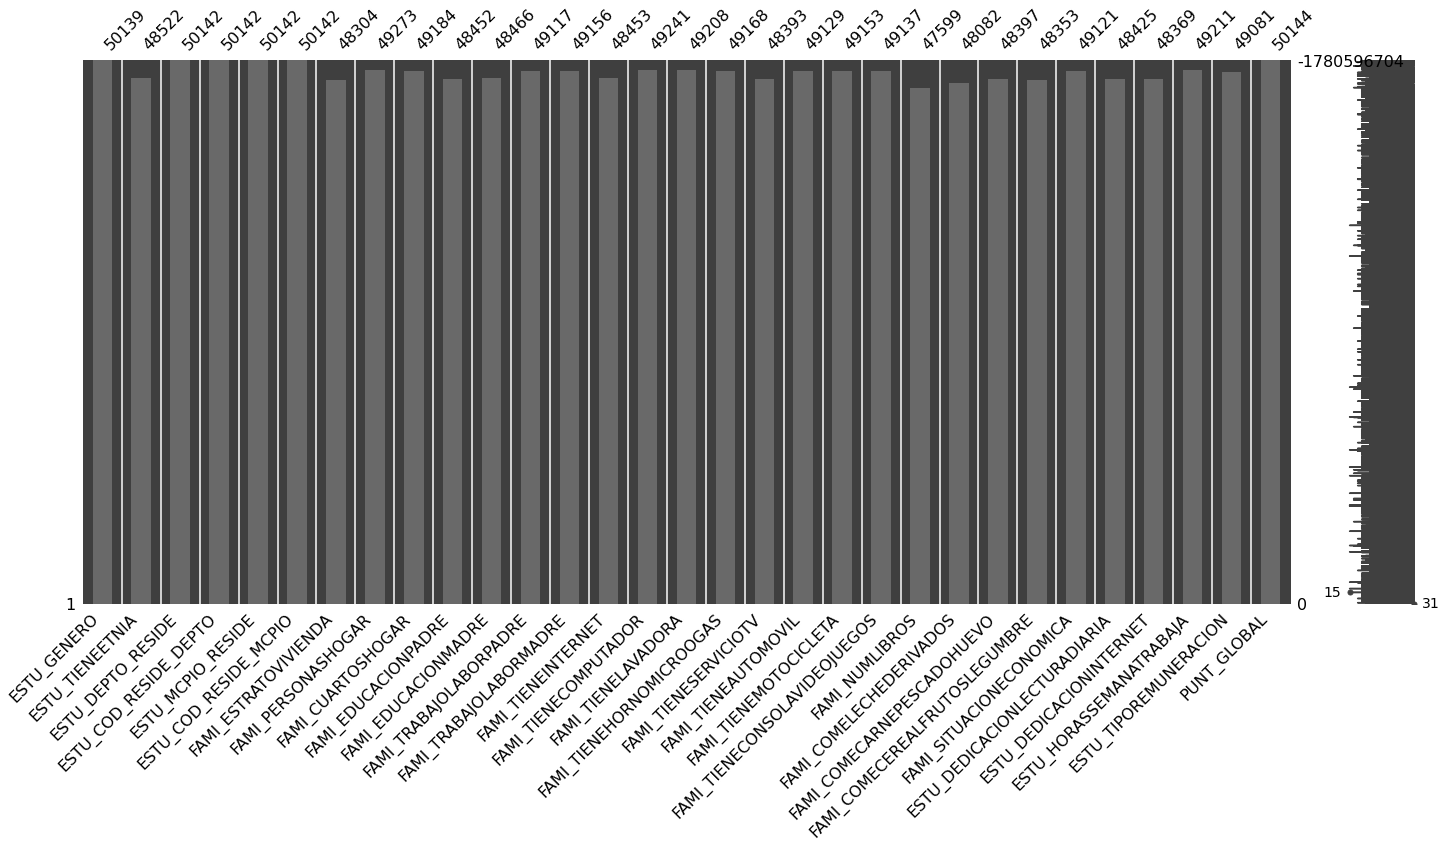

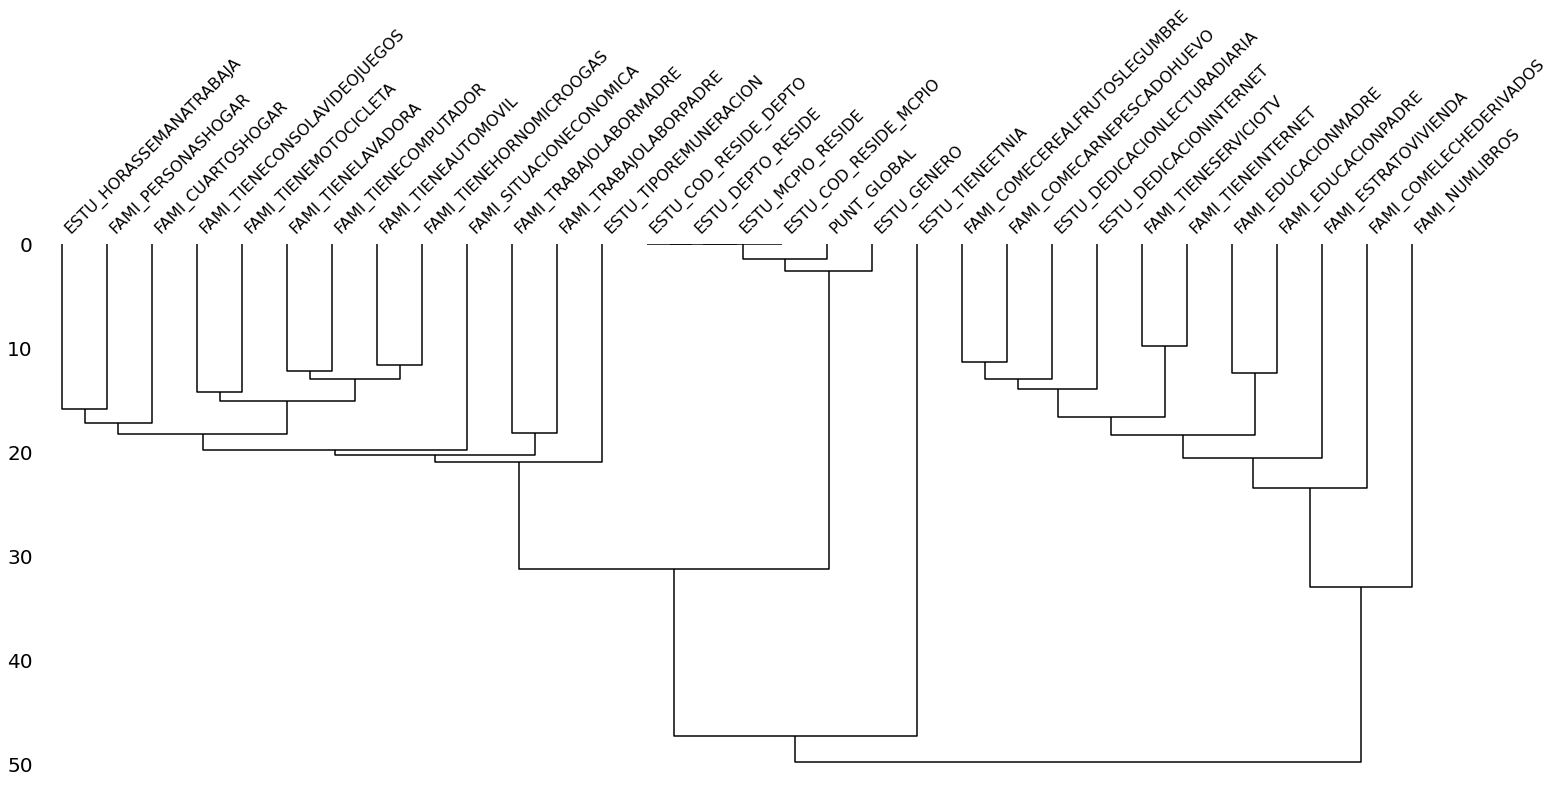

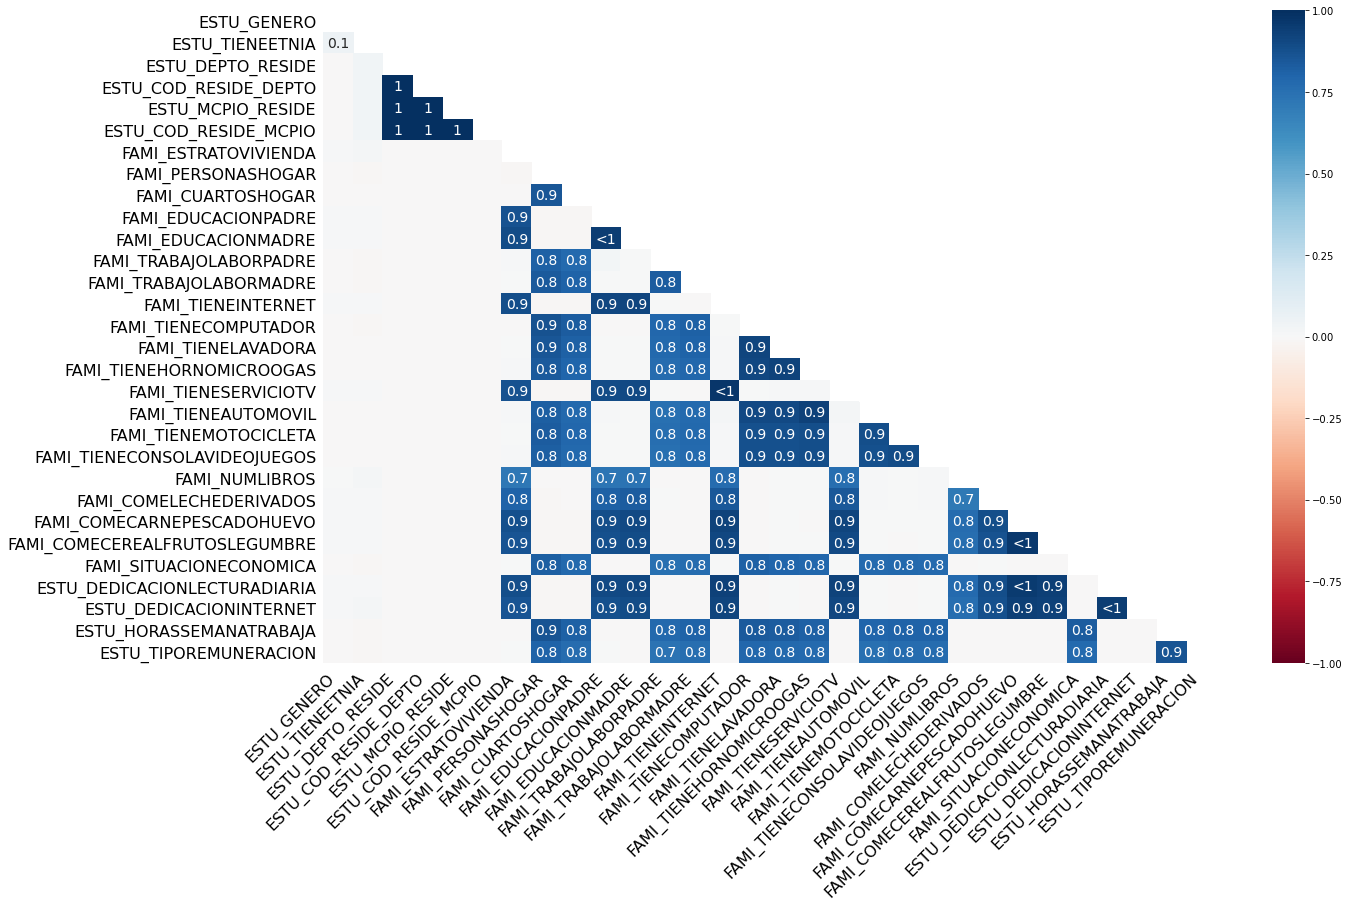

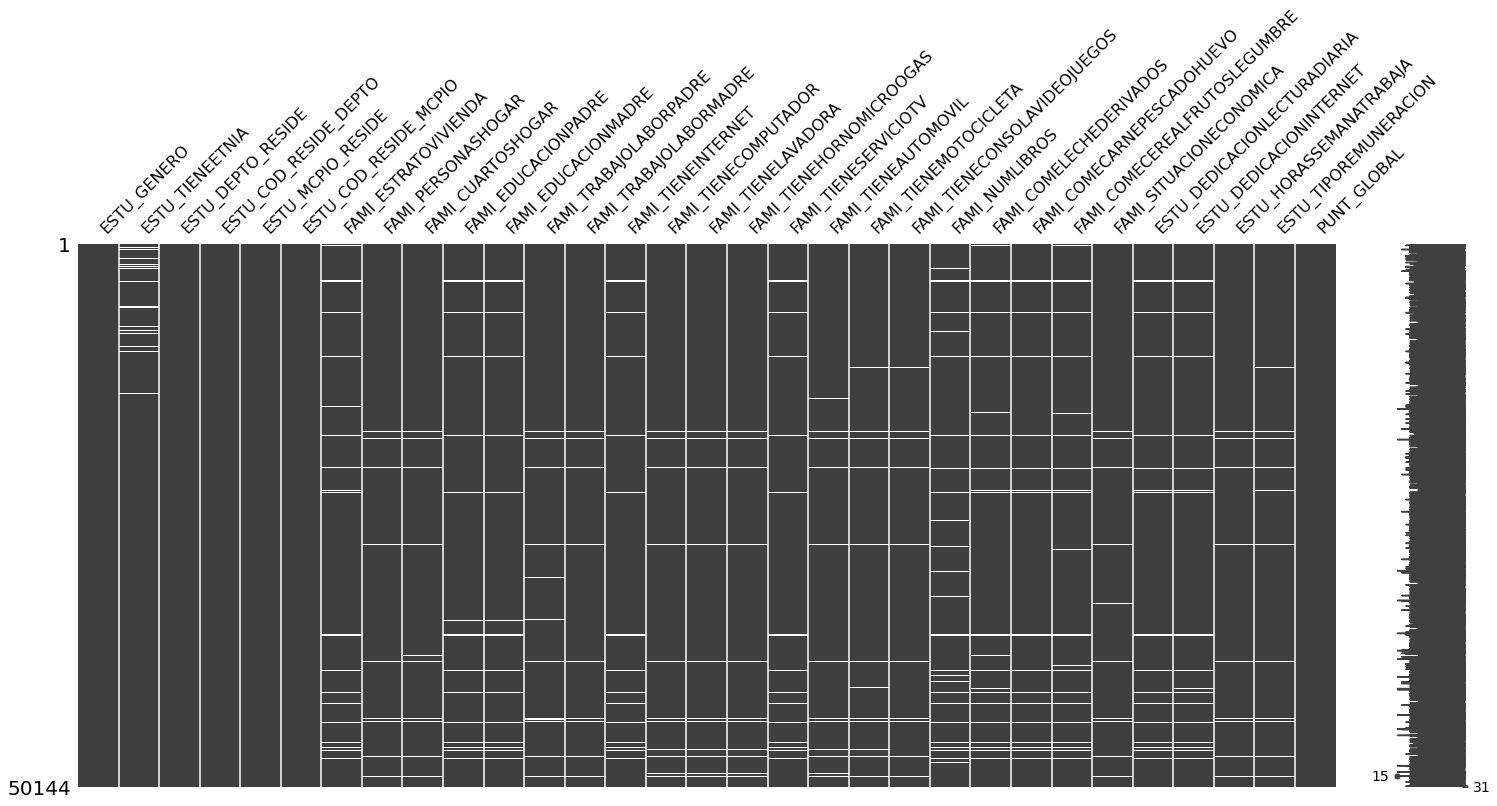

In [16]:
valores_vacios(data)
msno.heatmap(data)
mx = msno.matrix(data)

Podemos observar varios cambios:

1. Deliminando las variables de interes evidenciamos una mayor correlacion entre ellas.
2. se la cantidad de observaciones de la base en solo 3,7%
3. Se identifica otro grupo de variables que inicalmente no se ve una correlacion significativa, lo cual se puede proceder con la exlcusión de la base.
4. con la base que queda podemos proceder con modelos e imputación y ya pasariamos a evaluar outlier y que tanto puede afectar los modelos.

In [17]:
data = data.drop(['ESTU_DEPTO_RESIDE','ESTU_COD_RESIDE_DEPTO','ESTU_MCPIO_RESIDE','ESTU_COD_RESIDE_MCPIO','FAMI_PERSONASHOGAR',
           'FAMI_CUARTOSHOGAR','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','FAMI_TRABAJOLABORPADRE','FAMI_TRABAJOLABORMADRE',
           'ESTU_HORASSEMANATRABAJA','ESTU_TIPOREMUNERACION','FAMI_TIENEHORNOMICROOGAS','FAMI_NUMLIBROS',
           'FAMI_SITUACIONECONOMICA', 'FAMI_TIENELAVADORA'], axis=1)

Con las variables definidas en esta primera revisión procedo a realizar imputación.

A las variables categoricas se imputan con la moda y las variables numericas se imputan con la media.

In [18]:
data = imput_faltantes(data)

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

### Demograficas



Estrato 3      13475
Estrato 4       9463
Estrato 2       8176
Estrato 5       7896
Estrato 6       7193
Estrato 1       3337
Sin Estrato      604
Name: FAMI_ESTRATOVIVIENDA, dtype: int64

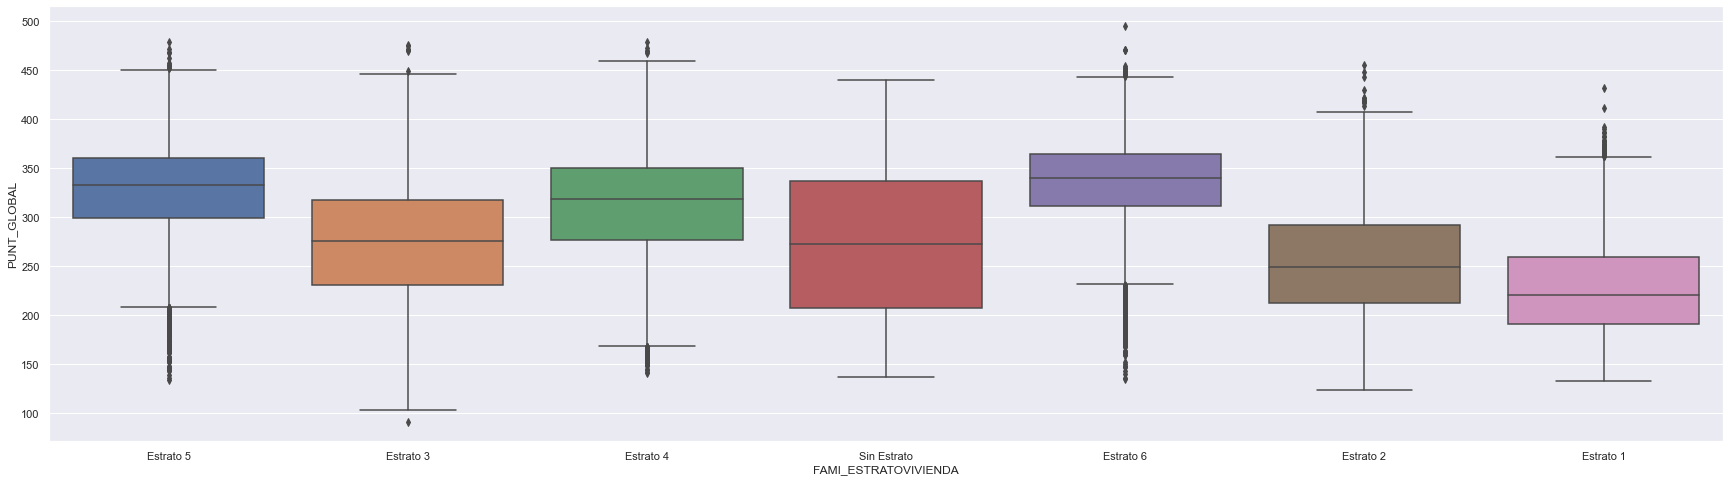

In [19]:
sns.set(rc={"figure.figsize":(30, 8)})
ax = sns.boxplot(x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL", data=data)
data["FAMI_ESTRATOVIVIENDA"].value_counts()

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

In [ ]:
# Código



# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

In [ ]:
# Código